In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [7]:
data = pd.read_csv('D:/STUDY DRIVE/PROJECTS/Stock Market Prediction/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [9]:
# Convert the close object to numeric type using panda library
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

# Data pre-processing where null/missing values will get dropped
data = data.dropna()

# Using iloc(Index Location) to consider only closing column as my training data
trainData = data.iloc[:,4:5].values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [11]:
# Using MinMaxScaler() for rescaling our data between 0's and 1's for better performances
sc = MinMaxScaler(feature_range=(0,1))

# fit_transform() to transform the values
trainData = sc.fit_transform(trainData)

# Printing the shape of training data
trainData.shape

(1149, 1)

In [12]:
# Prepare our data for training 
# Prepare input sequences to 60 times steps of extreme data alongside the respective y train labels 
# Adding another axis for batch_size since input for lstm network is 3D Tensor so it is having sequence length, time steps and batch_size.

X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [16]:
# Build a model containing the 4 layer lstm model network all followed by a dropout layer 
# On the top, we will have final dense layer 
# All of these, we will use adam optimiser and mean_squared_error as a loss function 

model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [17]:
#Train the data using 20 Epoch and batch_size of 32 using model.fit function and passing X train and Y train data

hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 19s - loss: 0.0283 - 19s/epoch - 548ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0106 - 7s/epoch - 210ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0131 - 8s/epoch - 222ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0088 - 7s/epoch - 201ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 194ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0105 - 7s/epoch - 196ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0073 - 7s/epoch - 196ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0066 - 7s/epoch - 187ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0069 - 7s/epoch - 195ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0066 - 6s/epoch - 185ms/step
Epoch 11/20
35/35 - 6s - loss: 0.0069 - 6s/epoch - 182ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0061 - 7s/epoch - 205ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0064 - 7s/epoch - 205ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 195ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 230ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0050 - 7s/epoch - 198ms/step
Epoch 17/20
35/

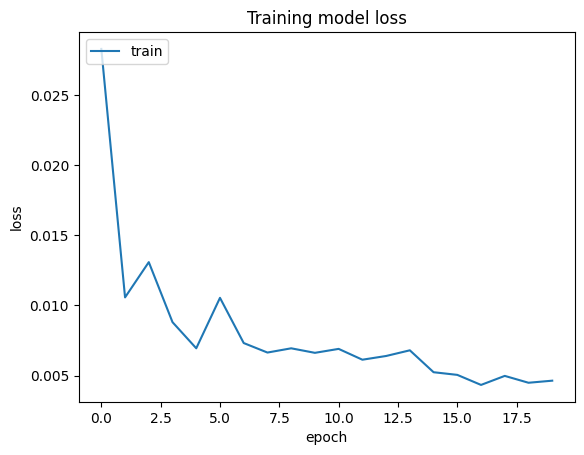

In [18]:
# Visualize the loss occured during the training process for each epoch using matplotlib library and plot function 

plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [20]:
# Test the dataset with the new dataset

testData = pd.read_csv('D:/STUDY DRIVE/PROJECTS/Stock Market Prediction/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

# input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [21]:
# Predicting the model output using the model.predict() and passing the X_test data 
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 31ms/step


array([[1.200658 ],
       [1.204029 ],
       [1.2159718],
       [1.2338947],
       [1.2490155],
       [1.2507519],
       [1.238725 ],
       [1.2203962],
       [1.2072803],
       [1.2025028],
       [1.1951948],
       [1.1838591],
       [1.1734214],
       [1.1637203],
       [1.1610535],
       [1.1652051],
       [1.1830784],
       [1.2120616],
       [1.2459992],
       [1.2802225],
       [1.2961136],
       [1.2949431],
       [1.2753717],
       [1.2452413],
       [1.216454 ],
       [1.1984109],
       [1.1924403],
       [1.1911148],
       [1.1844184],
       [1.1740581],
       [1.1621763],
       [1.1484252],
       [1.1280242],
       [1.102581 ],
       [1.0909277],
       [1.0989782],
       [1.1206619],
       [1.1467792],
       [1.1722881],
       [1.1865698],
       [1.1999838],
       [1.2153591],
       [1.2329935],
       [1.2496804],
       [1.2613907],
       [1.2636229],
       [1.2543174],
       [1.2447399],
       [1.2410002],
       [1.2456408],


In [23]:
# Plot the data between actual and predicted stock prices by using inverse_transform() over y_pred data
predicted_price = sc.inverse_transform(y_pred)

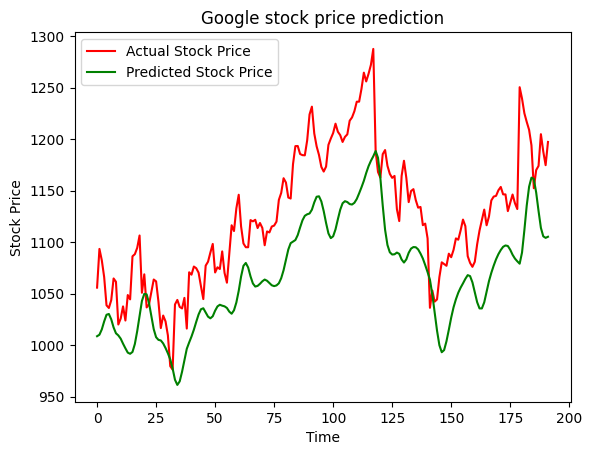

In [24]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()